In [1]:
import pandas as pd

hotel = pd.read_csv("Hotel_guests.csv")

# Create Date Column
month_dict = {"Januar": 1, "Februar": 2, "März": 3, "April": 4, "Mai": 5, "Juni": 6,
              "Juli": 7, "August": 8, "September": 9, "Oktober": 10, "November": 11, "Dezember": 12}


hotel["Date"] = pd.to_datetime(hotel["Jahr"].astype(str) + "-"+ hotel["Monat"].map(month_dict).astype(str), 
                               format='%Y-%m')
hotel["Date"] = hotel['Date'] + pd.offsets.MonthEnd(0)

hotel = hotel[["Date", "Total"]]
hotel.columns = ["Date", "Guests"]
hotel.set_index("Date", inplace = True)

hotel["Guests"] = hotel["Guests"].replace({" ": "", "\xa0": ""}, regex=True).astype(int)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

hotel["Guests"] = scaler.fit_transform(hotel["Guests"].values.reshape(-1, 1))
hotel

,Guests
Date,
2023-09-30,2.425216
2023-08-31,2.771573
2023-07-31,2.988111
2023-06-30,2.740028
2023-05-31,2.224717
...,...
1992-05-31,-0.521420
1992-04-30,-0.844306
1992-03-31,-0.750029


In [2]:
start_date = "2021-09-28"
end_date = "2023-11-08"


hotel_to_hour = hotel.resample("H").ffill()
hotel_to_hour = hotel_to_hour.reset_index()
hotel = hotel_to_hour.loc[(hotel_to_hour["Date"] >= start_date) & (hotel_to_hour["Date"] <= end_date)]
hotel.set_index("Date", inplace = True)
hotel

,Guests
Date,
2021-09-28 00:00:00,0.564360
2021-09-28 01:00:00,0.564360
2021-09-28 02:00:00,0.564360
2021-09-28 03:00:00,0.564360
2021-09-28 04:00:00,0.564360
...,...
2023-09-29 20:00:00,2.771573
2023-09-29 21:00:00,2.771573
2023-09-29 22:00:00,2.771573


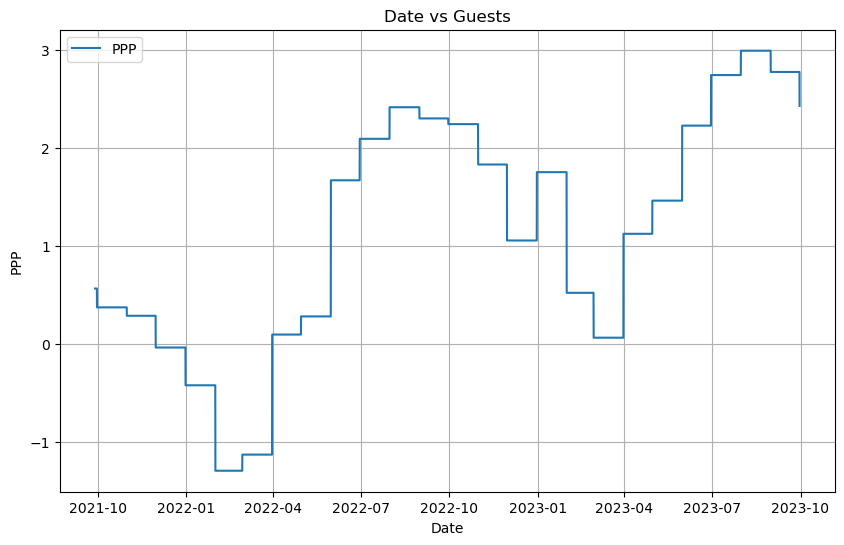

In [5]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hotel.index, hotel["Guests"], label = "PPP")

# Formatting
plt.title('Date vs Guests')
plt.xlabel('Date')
plt.ylabel('PPP')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hotel["Guests"] = scaler.fit_transform(hotel["Guests"].values.reshape(-1, 1))
display(hotel.head())

/var/folders/bp/ly_w1kqj7gs4yy61jdj69bqr0000gn/T/ipykernel_32655/2822255334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel["Guests"] = scaler.fit_transform(hotel["Guests"].values.reshape(-1, 1))


,Guests
Date,
2021-09-28 00:00:00,0.433804
2021-09-28 01:00:00,0.433804
2021-09-28 02:00:00,0.433804
2021-09-28 03:00:00,0.433804
2021-09-28 04:00:00,0.433804


In [10]:
hotel.to_csv("hotel_scaled.csv")